In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup

import requests

In [2]:
wiki_xml = requests.get("https://en.wikipedia.org/wiki/List_of_countries_by_income_equality").text
soup = BeautifulSoup(wiki_xml)
gini_df = pd.read_html(str(soup.find('table', id='UNandCIA')))[0]
gini_df = gini_df[[0, 2]]

gini_df.columns = ['Country', 'Gini']
gini_df = gini_df.loc[3:]
gini_df.Gini = gini_df.Gini.astype(np.float)

In [3]:
# Source: http://www.digitalnewsreport.org/survey/2020/overview-key-findings-2020/

share_view_df = pd.read_csv("data-UTAPV.csv")

In [4]:
share_view_df.Country = (share_view_df.Country
                         .replace('UK', 'United Kingdom')
                         .replace('USA', 'United States'))

In [5]:
df = share_view_df.merge(gini_df)
df

,Country,Share your point of view,No point of view,Challenge your point of view,Gini
0,Germany,15,80,5,5.1
1,Japan,17,78,6,5.4
2,United Kingdom,13,76,11,5.4
3,Denmark,14,68,18,4.0
4,Spain,34,55,11,7.3
5,Italy,22,65,13,7.0
6,United States,30,60,10,9.4
7,France,20,58,22,5.2
8,Brazil,43,51,6,21.1


In [6]:
colors = dict(zip(df.Country, map(plt.cm.Dark2, np.arange(0, 1., 1./len(df))[:, np.newaxis])))

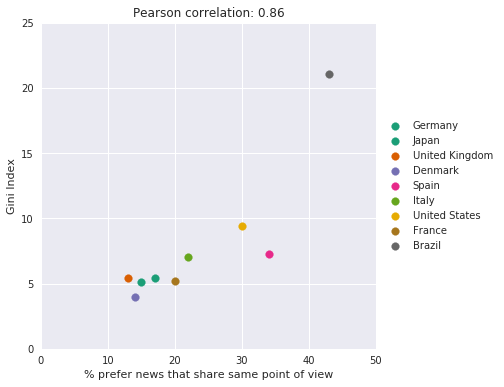

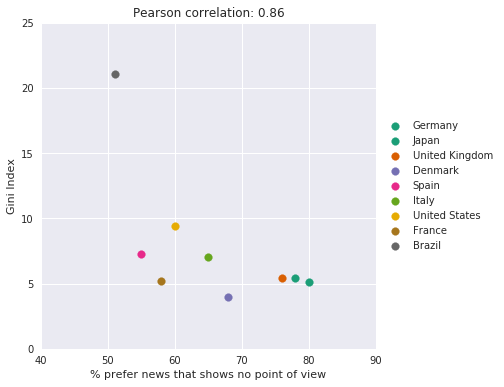

In [7]:
plt.style.use('seaborn')
for x_label, x_lim in (('Share your point of view', (0, 50)), ('No point of view', (40, 90))):
    plt.figure(figsize=(6, 6))
    plt.title("Pearson correlation: %.2f" % df[['Share your point of view', 'Gini']].corr().values[0, 1])
    
    for country, x, y in df[['Country', x_label, 'Gini']].values:
        plt.scatter(x, y, label=country, s=60, c=colors[country])
    lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel(f"% prefer news that {x_label.lower().replace('your', 'same').replace('no ', 'shows no ')}")
    plt.ylabel("Gini Index")
    plt.xlim(*x_lim)
    plt.ylim((0, 25))
    plt.savefig(x_label.lower().replace(' ', '-') + '.png', dpi=600,
               bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()